In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
import os

pd.set_option("display.max_columns", 100)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

In [146]:
df = pd.read_csv(
    r"C:\Users\khush\Python, 12-7\Practice\Projects\Customer_segment_project_ete\notebooks\data\marketing_campaign.csv", sep = '\t'
)

In [147]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [148]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

## Attributes

People

1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

Promotion

1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month

Target
Need to perform clustering to summarize customer segments.

In [149]:
## Find correlation between Promotional columns

## 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response'

<Axes: >

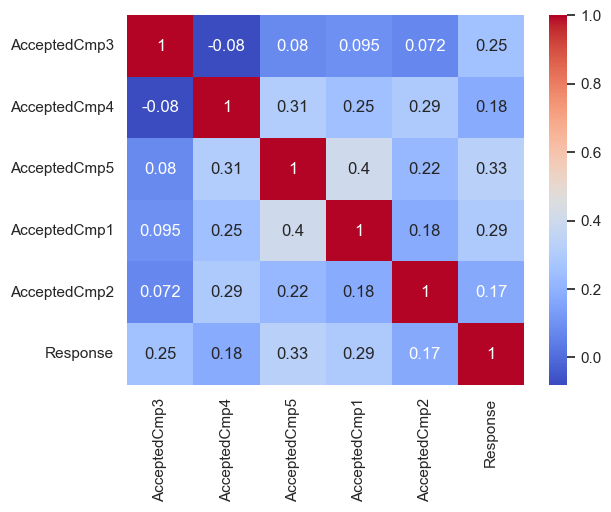

In [150]:
Promotionnal_data = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']]
corr = Promotionnal_data.corr()
sns.heatmap(corr, annot = True,cmap= 'coolwarm')

###  --------------------------------------------------------------------------  No correlated column

In [151]:
Promotionnal_data

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,1,0,0
2237,0,1,0,0,0,0
2238,0,0,0,0,0,0


<Axes: >

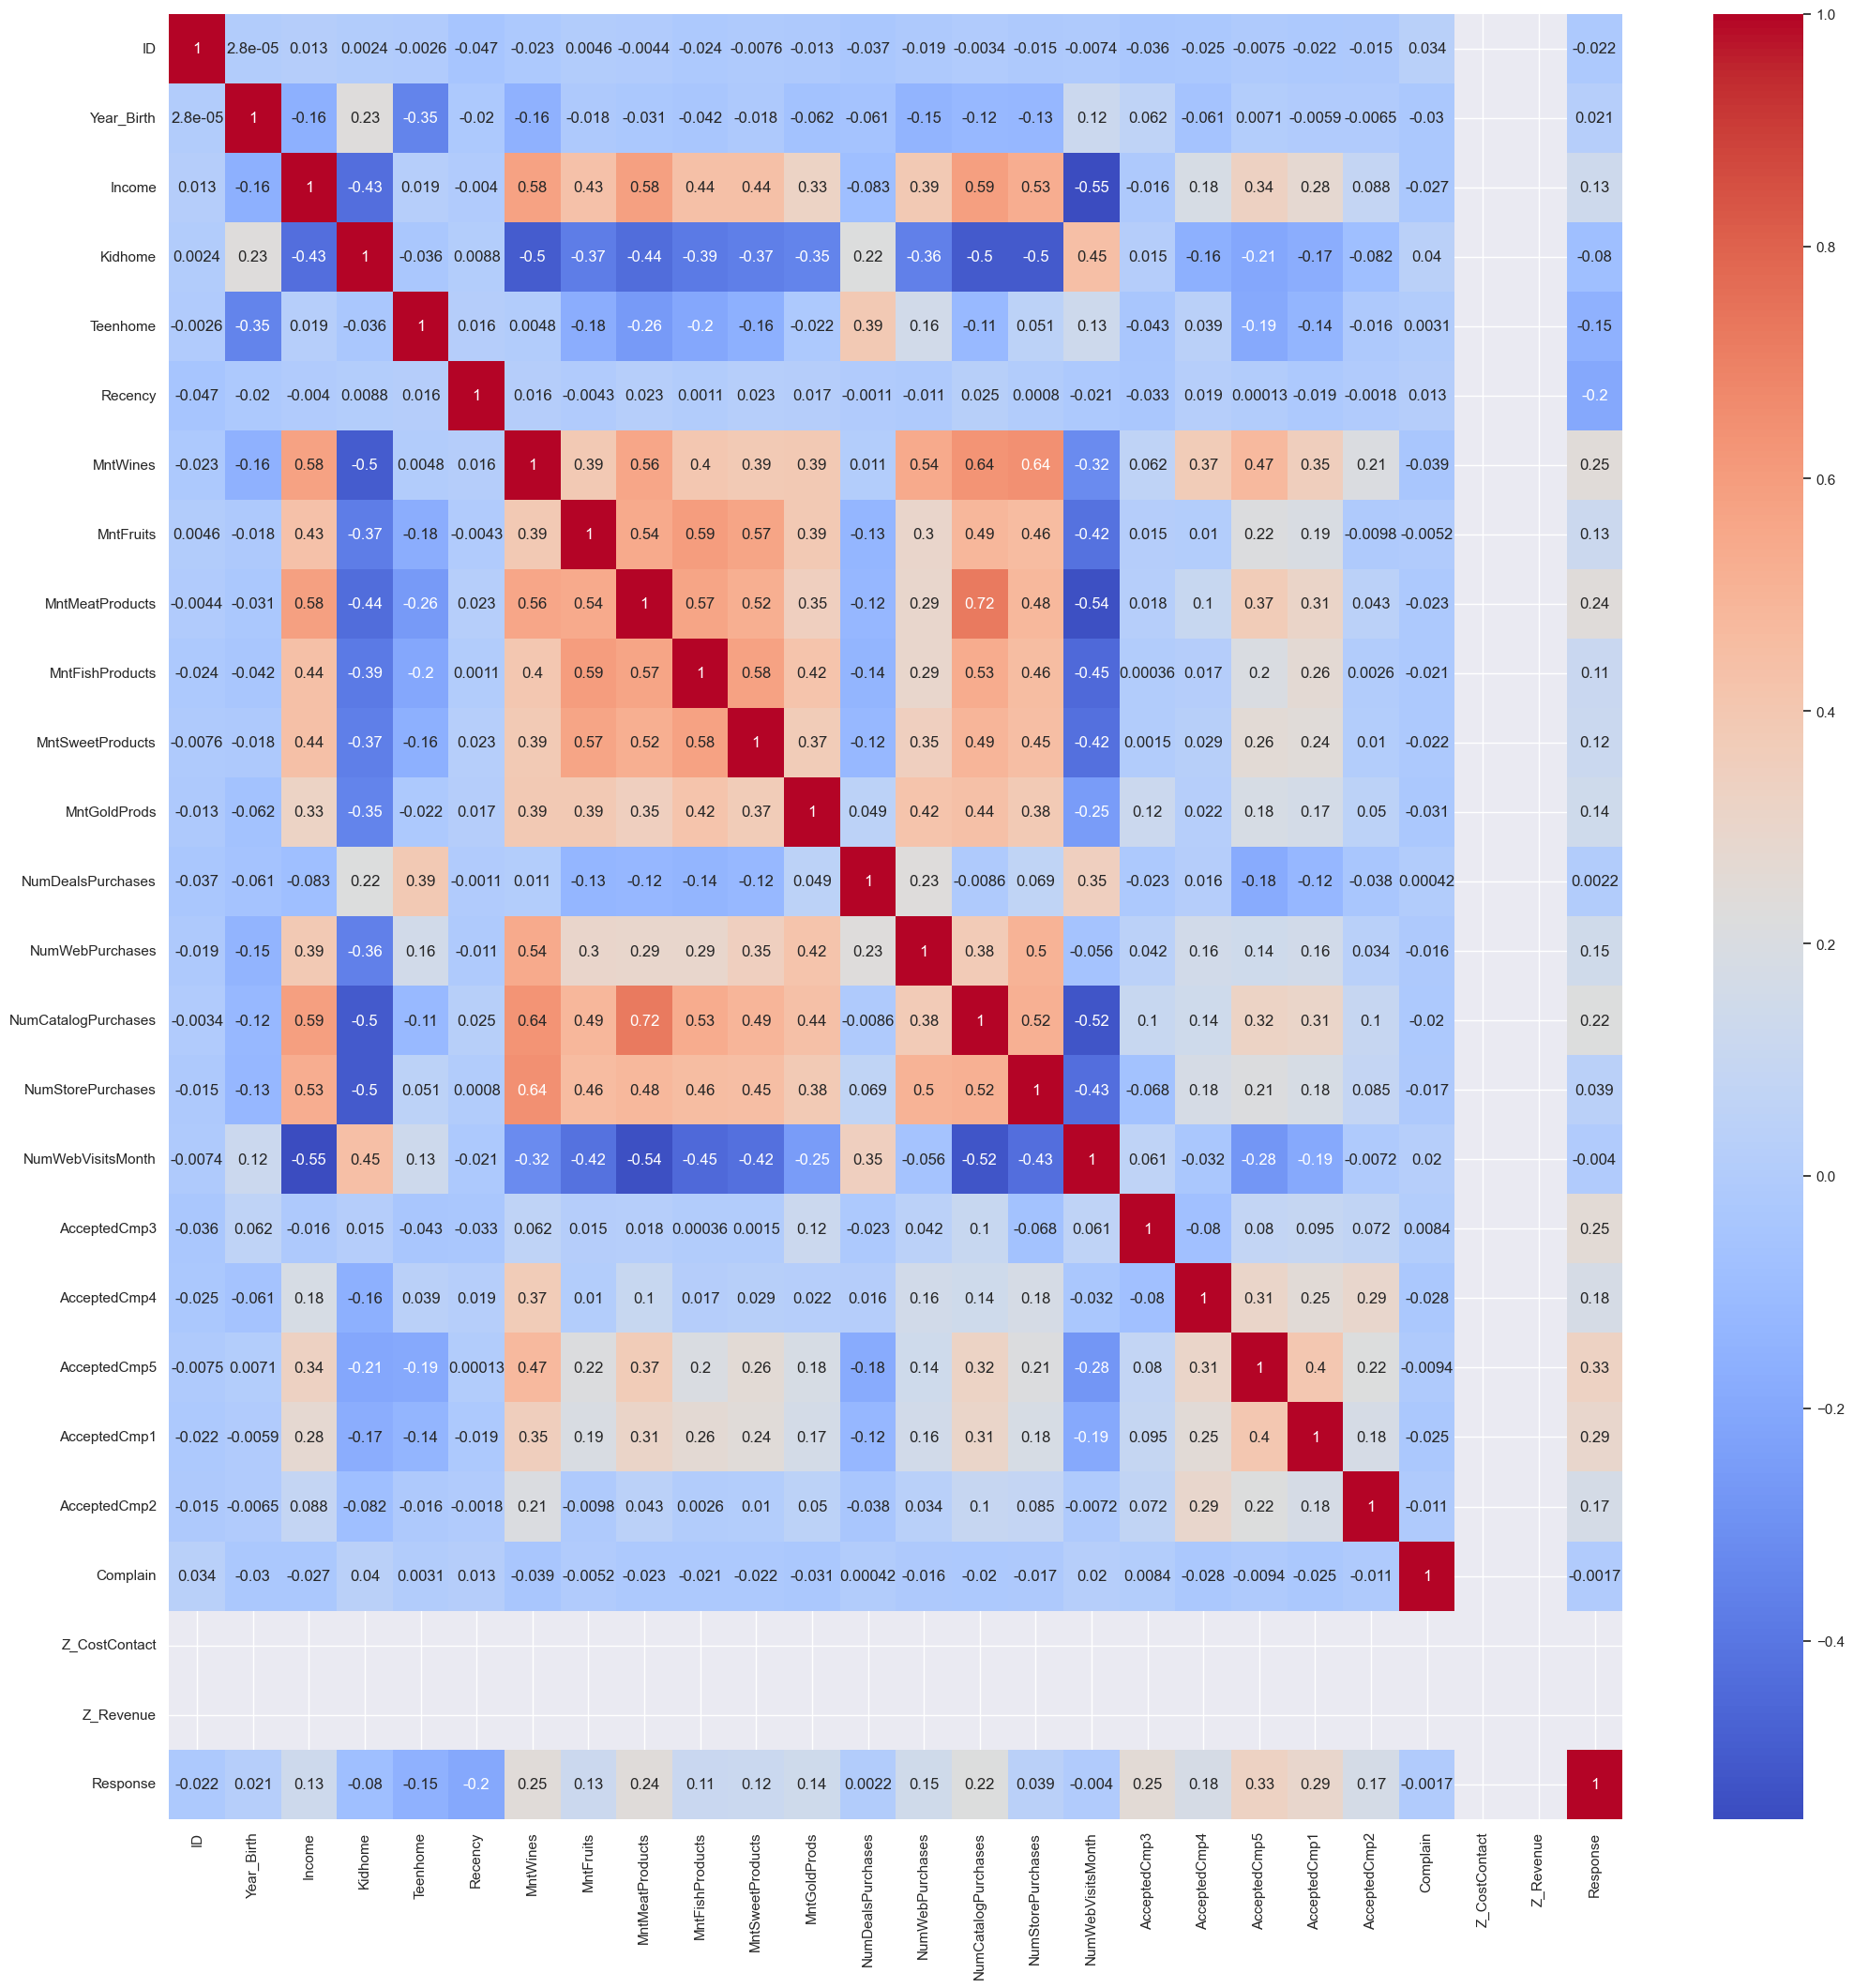

In [114]:
plt.figure(figsize = (25,25))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(), annot = True,cmap= 'coolwarm')

In [115]:
correlation_df = df.select_dtypes(exclude = 'object').corr()


In [116]:
correlation_df[correlation_df > 0.50].sum()

ID                     1.000000
Year_Birth             1.000000
Income                 3.281808
Kidhome                1.000000
Teenhome               1.000000
Recency                1.000000
MntWines               3.960907
MntFruits              2.705072
MntMeatProducts        4.506479
MntFishProducts        3.277554
MntSweetProducts       2.670880
MntGoldProds           1.000000
NumDealsPurchases      1.000000
NumWebPurchases        2.044978
NumCatalogPurchases    4.001431
NumStorePurchases      3.192914
NumWebVisitsMonth      1.000000
AcceptedCmp3           1.000000
AcceptedCmp4           1.000000
AcceptedCmp5           1.000000
AcceptedCmp1           1.000000
AcceptedCmp2           1.000000
Complain               1.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.000000
dtype: float64

### Null Values Detected

In [117]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


### Duplicate Values check

In [118]:
df.duplicated().sum()

0

In [119]:
# No duplicate values detected

In [120]:
df.shape

(2240, 29)

### Since we dont know the defination of these 2 columns, lets check them :-- "Z_CostContact", "Z_Revenue"

In [121]:
print(df['Z_CostContact'].value_counts())
print()
print(df['Z_Revenue'].value_counts())

Z_CostContact
3    2240
Name: count, dtype: int64

Z_Revenue
11    2240
Name: count, dtype: int64


In [122]:
# We will drop these columns in future

In [123]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [124]:
# Married, Together    -- Couples
# Single, Alone, Absurd, YOLO, Widow, Divorced -- Single
# Widow --> Since Widows are more likely to be Single
# Divorcee --> Since 10-15% of couples reconcile after they separate (Google data)




In [125]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [126]:
# High School --> '2n Cycle', 'Basic'
# Bachelors --> 'Graduation'
# Higher Education - 'PhD', 'Master'

In [127]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [128]:
df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [129]:
df['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

<Axes: >

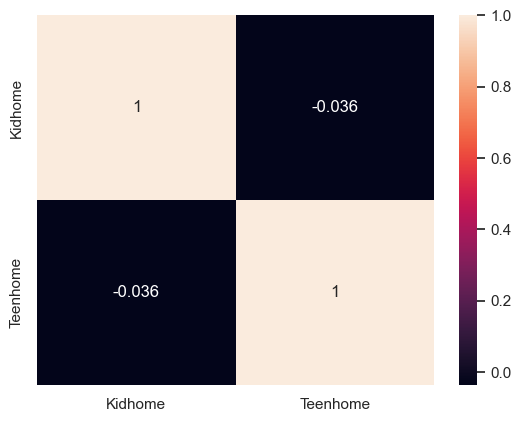

In [130]:
sns.heatmap(df[['Kidhome', 'Teenhome']].corr(),annot= True)

In [131]:
# No correlation but they mean the same, whether that person have children or not
# Will add them and merge into one column

In [132]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [133]:
# Amount Spent - 'MntWines'+ 'MntFruits'+'MntMeatProducts'+ 'MntFishProducts'+ 'MntSweetProducts'+ 'MntGoldProds'

<Axes: >

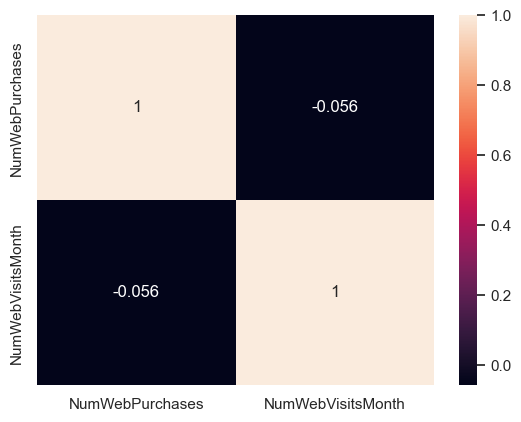

In [134]:
sns.heatmap(df[['NumWebPurchases', 'NumWebVisitsMonth']].corr(),annot = True)

#### Preprocessing
1. Income -- Impute null values with the mean
2. Dt_Customer -- to_datetime -- convert to months
3. Z_CostContact, Z_Revenue - same values - DROP
4. Drop columns - ID, Z_CostContact, 		Z_Revenue, 
5. Marital_Status -->
		Married, Together    -- Couples
		Single, Alone, Absurd, YOLO, 				Widow, Divorced -- Single

6. Education -->
		High School --> '2n Cycle', 				'Basic'
		Bachelors --> 'Graduation'
		Higher Education - 'PhD', 'Master'

7. Kidhome, Teenhome -- 
		df['Child'] = 'Kidhome' + 		'Teenhome'

8. Amount Spent = 			'MntWines'+'MntFruits'+'MntMeatProducts'+ 		'MntFishProducts'+ 'MntSweetProducts'+ 			'MntGoldProds'
9. Total Purchases - NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
10. Target - AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response
11. Year_Birth - Fing Age








In [135]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

In [136]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [137]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [138]:
#Impute Null values
impute = SimpleImputer(missing_values = np.nan,
              strategy= 'median')
series = impute.fit_transform(df['Income'].values.reshape(-1, 1))

In [139]:
#How old the customer is?
# Dt_Customer
max_date = max(pd.to_datetime(df['Dt_Customer'],format = '%d-%M-%Y'))
checker = max_date - pd.to_datetime(df['Dt_Customer'],format = '%d-%M-%Y')
checker.dt.days
def Dt_Customer_Transform(dataset):
    
    dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'],format = '%d-%M-%Y')
    max_date = max(dataset['Dt_Customer'])
    dataset['Dt_Customer'] = (max_date - dataset['Dt_Customer']).dt.days
    return dataset['Dt_Customer']
Dt_Customer_Transform(df)

0       757
1        23
2       374
3        21
4        12
       ... 
2235    382
2236     20
2237      6
2238      7
2239    746
Name: Dt_Customer, Length: 2240, dtype: int64

In [140]:
# Marital_Status 


def Marital_Status_update(dataset):
    status_update = {'Married' : "Couple", "Together" : "Couple",
                    "Alone" : "Single", "Absurd" : "Single", "YOLO": "Single","Widow": "Single","Divorced" : "Single","Single":"Single"}

    dataset['Marital_Status'] = dataset['Marital_Status'].map(status_update)
    return dataset

In [141]:
# Education Transformer
def Education_Transformer(dataset):
    education_map = {"2n Cycle" : "High School", 'Basic' : "High School",
                     'Graduation' : "Bachelors",
                     'PhD': "Higher Education", "Master": "Higher Education"}
    dataset['Education'] = dataset['Education'].map(education_map)
    return dataset

## Building Pipeline

In [15]:
df = pd.read_csv(
    r"C:\Users\khush\Python, 12-7\Practice\Projects\Customer_segment_project_ete\notebooks\data\marketing_campaign.csv", sep = '\t'
)
df2 = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])
#df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y', errors='coerce')


# Dt_Customer_Transform
def Dt_Customer_Transform(dataset):
    
    dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'],format='%d-%M-%Y')
    max_date = max(dataset['Dt_Customer'])
    l1 = (max_date - dataset['Dt_Customer']).dt.days
    dataset['Dt_Customer'] = l1
    return dataset

# Marital_Status 


def Marital_Status_update(dataset):
    status_update = {'Married' : "Couple", "Together" : "Couple",
                    "Alone" : "Single", "Absurd" : "Single", "YOLO": "Single", "Widow": "Single","Divorced" : "Single","Single":"Single"}

    dataset['Marital_Status'] = dataset['Marital_Status'].map(status_update)
    encoder_map = {"Couple":1, "Single" : 0}
    dataset['Marital_Status'] = dataset['Marital_Status'].map(encoder_map)
    return dataset

# Education

def Education_Transformer(dataset):
    education_map = {"2n Cycle" : "High School", 'Basic' : "High School",
                     'Graduation' : "Bachelors",
                     'PhD': "Higher Education", "Master": "Higher Education"}
    
    dataset['Education'] = dataset['Education'].map(education_map)
    encoder_map = {"High School": 0, "Bachelors" : 1, "Higher Education" :2}
    dataset['Education'] = dataset['Education'].map(encoder_map)

    return dataset

#Merging 2 columns

def kid_teenhome_combine(dataset):
    dataset['childornot'] = dataset['Kidhome'] + dataset['Teenhome']
    dataset = dataset.drop(columns = ['Kidhome', 'Teenhome'])
    return dataset

# Amount Spent = 'MntWines' + 'MntFruits' + 'MntMeatProducts' + 'MntFishProducts' + 'MntSweetProducts' + 'MntGoldProds'

def total_amount_spend(dataset):
    dataset['Amount spend'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] +dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']
    dataset = dataset.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
    return dataset

# Total Purchases - NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases

def total_num_purchases(dataset):
    dataset['total_num_purchases'] = dataset['NumDealsPurchases'] + dataset['NumWebPurchases'] + dataset['NumCatalogPurchases'] + dataset['NumStorePurchases']
    dataset = dataset.drop(columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])
    return dataset

# Find age from Year_Birth 
def find_age(dataset):
    current_year = 2023
    dataset['Year_Birth'] = current_year - dataset['Year_Birth'] 
    return dataset

#Target Variable

def target(dataset):
    dataset['Final_Response'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5'] + dataset['Response']
    dataset['Final_Response'] = dataset['Final_Response'].apply(lambda x : 1 if x >= 1 else 0)
    dataset.drop(columns = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response'])
    return dataset

transformer = ColumnTransformer([
    ("Simple Imputer - Null Values", SimpleImputer(missing_values = np.nan, strategy= 'median'), ['Income']),
    ("Dt_Customer_Transform", FunctionTransformer(Dt_Customer_Transform), ['Dt_Customer']),
    ("Marital_Status_update", FunctionTransformer(Marital_Status_update), ['Marital_Status']),
    ("Education_Transformer", FunctionTransformer(Education_Transformer), ['Education']),
    ('kid_teenhome_combine', FunctionTransformer(kid_teenhome_combine), ['Kidhome', 'Teenhome']),
    ('total_amount_spend', FunctionTransformer(total_amount_spend), ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts' ,'MntSweetProducts', 'MntGoldProds']),
    ('total_num_purchases', FunctionTransformer(total_num_purchases), ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']),
    ("find_age", FunctionTransformer(find_age), ['Year_Birth']),
    ("target", FunctionTransformer(target), ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response'])

    
],remainder= 'passthrough')
final_output = transformer.fit_transform(df2)
df_2 = pd.DataFrame(final_output)
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,58138.0,757.0,0.0,1.0,0.0,1617.0,25.0,66.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,58.0,7.0,0.0
1,46344.0,23.0,0.0,1.0,2.0,27.0,6.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0
2,71613.0,374.0,1.0,1.0,0.0,776.0,21.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,4.0,0.0
3,26646.0,21.0,1.0,1.0,1.0,53.0,8.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,6.0,0.0
4,58293.0,12.0,1.0,2.0,1.0,422.0,19.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,382.0,1.0,1.0,1.0,1341.0,18.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,5.0,0.0
2236,64014.0,20.0,1.0,2.0,3.0,444.0,22.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0
2237,56981.0,6.0,0.0,1.0,0.0,1241.0,19.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,91.0,6.0,0.0
2238,69245.0,7.0,1.0,2.0,1.0,843.0,23.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0


In [42]:
df = pd.read_csv(
    r"C:\Users\khush\Python, 12-7\Practice\Projects\Customer_segment_project_ete\notebooks\data\marketing_campaign.csv", sep = '\t'
)
df2 = df.copy(deep = True)
#df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y', errors='coerce')


def Preprocessor_transformer(dataset):
    # Dt_Customer_Transform
    dataset = dataset.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])

    dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'],format='%d-%M-%Y')
    max_date = max(dataset['Dt_Customer'])
    l1 = (max_date - dataset['Dt_Customer']).dt.days
    dataset['Dt_Customer'] = l1
    
    #Marriage
    status_update = {'Married' : "Couple", "Together" : "Couple",
                    "Alone" : "Single", "Absurd" : "Single", "YOLO": "Single", "Widow": "Single","Divorced" : "Single","Single":"Single"}

    dataset['Marital_Status'] = dataset['Marital_Status'].map(status_update)
    encoder_map = {"Couple":1, "Single" : 0}
    dataset['Marital_Status'] = dataset['Marital_Status'].map(encoder_map)
    
    # Education

    education_map = {"2n Cycle" : "High School", 'Basic' : "High School",
                     'Graduation' : "Bachelors",
                     'PhD': "Higher Education", "Master": "Higher Education"}
    
    dataset['Education'] = dataset['Education'].map(education_map)
    encoder_map = {"High School": 0, "Bachelors" : 1, "Higher Education" :2}
    dataset['Education'] = dataset['Education'].map(encoder_map)
    
    

    # kid_teenhome_combine
    
    dataset['childornot'] = dataset['Kidhome'] + dataset['Teenhome']
    dataset = dataset.drop(columns = ['Kidhome', 'Teenhome'])

    # Amount Spent
    dataset['Amount spend'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] +dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']
    dataset = dataset.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
    
    # Total Purchases
    dataset['total_num_purchases'] = dataset['NumDealsPurchases'] + dataset['NumWebPurchases'] + dataset['NumCatalogPurchases'] + dataset['NumStorePurchases']
    dataset = dataset.drop(columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])
    
    # Find age from Year_Birth 

    current_year = 2023
    dataset['Year_Birth'] = current_year - dataset['Year_Birth'] 
    
    #Target Variable

    dataset['Final_Response'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5'] + dataset['Response']
    dataset['Final_Response'] = dataset['Final_Response'].apply(lambda x : 1 if x >= 1 else 0)
    dataset.drop(columns = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response'])
 
    return dataset

transformed_cols = ['Dt_Customer','Marital_Status','Education', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Year_Birth',
                   'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response',
                   'ID', 'Z_CostContact', 'Z_Revenue']

transformer = ColumnTransformer([
    ("Simple Imputer - Null Values", SimpleImputer(missing_values = np.nan, strategy= 'median'), ['Income']),
    ("Dt_Customer_Transform", FunctionTransformer(Preprocessor_transformer), transformed_cols),
    
],remainder= 'passthrough')
final_output = transformer.fit_transform(df2)
df_1 = pd.DataFrame(final_output)
df_1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,58138.0,757.0,0.0,1.0,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1617.0,25.0,1.0,58.0,7.0,0.0
1,46344.0,23.0,0.0,1.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27.0,6.0,0.0,38.0,5.0,0.0
2,71613.0,374.0,1.0,1.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.0,21.0,0.0,26.0,4.0,0.0
3,26646.0,21.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,8.0,0.0,26.0,6.0,0.0
4,58293.0,12.0,1.0,2.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,422.0,19.0,0.0,94.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,382.0,1.0,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1341.0,18.0,0.0,46.0,5.0,0.0
2236,64014.0,20.0,1.0,2.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,444.0,22.0,1.0,56.0,7.0,0.0
2237,56981.0,6.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1241.0,19.0,1.0,91.0,6.0,0.0
2238,69245.0,7.0,1.0,2.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,843.0,23.0,0.0,8.0,3.0,0.0


In [43]:
l1 = list(df.columns )
l2 = transformed_cols

l3 = [i for i in l1 if i not in l2]
l3

['Income', 'Recency', 'NumWebVisitsMonth', 'Complain']

In [36]:
l3

['ID',
 'Income',
 'Recency',
 'NumWebVisitsMonth',
 'Complain',
 'Z_CostContact',
 'Z_Revenue']

In [ ]:
['ID', 'Z_CostContact', 'Z_Revenue']




In [32]:
a = "banana"
a.count('a')

3

In [28]:
transformed_cols

['Dt_Customer',
 'Marital_Status',
 'Education',
 'Kidhome',
 'Teenhome',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Year_Birth',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [23]:
print(list(df.columns).extend(transformed_cols))

None


In [21]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [24]:
fruits = ['apple', 'banana', 'cherry']

cars = ['Ford', 'BMW', 'Volvo']

fruits.extend(cars)

In [25]:
fruits

['apple', 'banana', 'cherry', 'Ford', 'BMW', 'Volvo']

In [163]:
df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] +df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2240, dtype: int64

In [159]:
def total_amount_spend(dataset):
    dataset['Amount spend'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] +dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']
    dataset = dataset.drop(columns = ['MntWines' + 'MntFruits' + 'MntMeatProducts' + 'MntFishProducts' + 'MntSweetProducts' + 'MntGoldProds'])
    return dataset

total_amount_spend(df2)

KeyError: "['MntWinesMntFruitsMntMeatProductsMntFishProductsMntSweetProductsMntGoldProds'] not found in axis"

In [144]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,757,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,23,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,374,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,21,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,12,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,382,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,20,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,6,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,7,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [96]:
df2 = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])
def Dt_Customer_Transform(dataset):
    
    dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'],format='%d-%M-%Y')
    max_date = max(dataset['Dt_Customer'])
    l1 = []
    l1 = (max_date - dataset['Dt_Customer']).dt.days
    dataset['Dt_Customer'] = l1
    return l1
Dt_Customer_Transform(df2)

0       757
1        23
2       374
3        21
4        12
       ... 
2235    382
2236     20
2237      6
2238      7
2239    746
Name: Dt_Customer, Length: 2240, dtype: int64

In [97]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [37]:
df2 = df.drop(columns = [])

In [38]:
columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
